### Yuchen Cao,  4/26/2019

<h2><center>Modeling Nuclear Separation Energies using Neural Networks</center></h2>

### 1 - Basic nuclear physics concepts

---

#### 1.1 Atomic Nucleus
The atomic nucleus is the small, dense region consisting of protons and neutrons at the center of an atom.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Helium_atom_QM.svg/1200px-Helium_atom_QM.svg.png" width="50%"/>

<p><center>Helium-4 atom<center></p>

#### 1.2 Nuclear Binding Energy (BE)
The minimum energy required to split a nucleus into its component parts: protons and neutrons.

\begin{equation}
\frac{BE(N,Z)}{c^{2}}=Z m_{p}+N m_{n}-m_{nucleus}
\end{equation}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/NuclearReaction.svg/1200px-NuclearReaction.svg.png" width="30%"/>


Average Binding Energy per nucleon

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Binding_energy_curve_-_common_isotopes.svg/1200px-Binding_energy_curve_-_common_isotopes.svg.png" width="80%"/>


### 2 - Theoretical calculation of Binding Energy

---
##### 2.1 Liquid Drop Model (Semi-Empirical)
\begin{equation}
BE(N,Z)=a_{V} A-a_{S} A^{2 / 3}-a_{C} \frac{Z(Z-1)}{A^{1 / 3}}-a_{A} \frac{(A-2 Z)^{2}}{A} \pm \delta(A, Z),
\end{equation}
where $A = N+Z$.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Liquid_drop_model.svg/1200px-Liquid_drop_model.svg.png" width="80%"/>


##### 2.2 Density Functional Theory (Self-Consistent Mean-Field Variational Theory)
<img src="CMSE802_final_imgs/nuclear_dof.png" width="100%"/>

\begin{equation}
{E=\int \mathrm{d}^{3} \mathbf{r} \mathcal{H}(\mathbf{r})} {=\int \mathrm{d}^{3} \mathbf{r}\left[\mathcal{E}^{\mathrm{kin}}(\mathbf{r})+\chi_{0}(\mathbf{r})+\chi_{1}(\mathbf{r})+\widetilde{\chi}(\mathbf{r})+\mathcal{E}^{\mathrm{Coul}}(\mathbf{r}) \right]}
\end{equation}

### 3 - Residuals

---
\begin{equation}
BE^{\exp }(Z, N)=BE^{\mathrm{th}}(Z, N, \vartheta)+\delta(Z, N)
\end{equation}


##### 3.1 Binding Energy Residuals

<img src="CMSE802_final_imgs/BE_res_SLY4.png" width="70%"/>


##### 3.2 Two-Neutron Separation Energy S$_{2n}$:
\begin{eqnarray}
S_{2n}(N,Z) = BE(N,Z) - BE(N-2,Z) 
\end{eqnarray}

Using S$_{2n}$ can remove some systematic error of theory model.

<img src="CMSE802_final_imgs/s2n_res_SLY4.png" width="70%">

S$_{2n}$ residuals:

\begin{equation}
S_{2 n}^{\exp }(Z, N)=S_{2 n}^{\mathrm{th}}(Z, N, \vartheta)+\delta(Z, N)
\end{equation}

##### 3.3 Modeling Residuals:
\begin{equation}
\delta^{\mathrm{em}}(Z, N) = S_{2 n}^{\exp }(Z, N) - S_{2 n}^{\mathrm{th}}(Z, N, \vartheta)
\end{equation}

Improved theory estimate:
\begin{equation}
S_{2 n}^{\mathrm{est}}(Z, N)=S_{2 n}^{\mathrm{th}}(Z, N, \vartheta)+\delta^{\mathrm{em}}(Z, N)
\end{equation}

##### 3.4 Data sets:

Theory: UNEDF0,UNEDF1,UNEDF2, SkM*, SLy4, SV-min, SkP, FRDM-2012, HFB-24

Experiment: AME2003 (training+validating), AME2016 (testing)


<img src="CMSE802_final_imgs/ame_datasets.png" width="70%"/>


### 4 - Preparations

---
#### 4.1 Import Libraries

In [36]:
from keras.layers import Dense, Activation, Dropout, Conv1D, Flatten,LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.gridspec as gridspec

#### 4.2 Read in S$_{2n}$ data

In [37]:
s2n = pd.read_csv("data_S2n_2018_even_Z_even_N.csv")
s2n.head(10)

,Z,N,AME2003,AME2003_sd,AME2016,AME2016_sd,JYFLTRAP2017,JYFLTRAP2017_sd,TRIUMF2018,TRIUMF2018_sd,...,new_other_sd,SKM*,SKP,SLY4,SVMIN,UNEDF0,UNEDF1,UNEDF2,FRDM2012,HFB24
0,2,4,0.97244,0.00076,0.97545,5e-05,*,*,*,*,...,*,7.168914,6.175707,5.43824,3.987916,5.298802,4.53857,4.504942,*,*
1,2,6,2.1397,0.00691,2.12505,0.0001,*,*,*,*,...,*,2.540308,0.97832,0.402399,1.442764,0.772771,1.365737,1.220525,*,*
2,2,8,*,*,*,*,*,*,*,*,...,*,-2.102566,-3.239243,-3.5705,-1.599349,-2.073222,-1.320502,-1.863978,*,*
3,2,10,*,*,*,*,*,*,*,*,...,*,-4.935763,-6.138534,-7.020108,-5.264757,-5.221013,-4.165611,-4.754517,*,*
4,2,12,*,*,*,*,*,*,*,*,...,*,-5.261139,-7.213507,-8.051487,-6.849926,-6.481195,-6.448865,-6.892747,*,*
5,2,14,*,*,*,*,*,*,*,*,...,*,-5.167079,-7.28062,-8.363203,-6.693687,-6.10919,-5.990573,*,*,*
6,2,16,*,*,*,*,*,*,*,*,...,*,-5.566208,-7.307499,-8.335196,-6.44048,-5.709789,-5.633526,*,*,*
7,2,18,*,*,*,*,*,*,*,*,...,*,-5.877151,-7.134207,-8.153501,-6.2019,-5.321152,-5.337646,*,*,*
8,2,20,*,*,*,*,*,*,*,*,...,*,-5.862445,-6.906798,-7.894181,-6.004909,-5.201682,-5.209019,*,*,*
9,2,22,*,*,*,*,*,*,*,*,...,*,-5.475503,-6.60486,-7.761987,-5.815174,-5.287227,-5.042696,*,*,*


#### 4.3 Data pre-processing
1. Remove experimental data that won't be used in this practice,
2. Merge proton and neutron number into one column,
3. Replace null data with standard NaN.

In [38]:
s2n = s2n.drop(columns=['AME2003_sd', 'AME2016_sd','JYFLTRAP2017','JYFLTRAP2017_sd',
                  'TRIUMF2018','TRIUMF2018_sd','new_other','new_other_sd','RIKEN2018',
                'RIKEN2018_sd'])

# Create column with (Z,N) pair
X = list(zip(s2n['Z'],s2n['N']))
s2n.insert(loc=0,value=X,column='nuc')
#s2n = s2n.drop(columns=['Z','N'])

# replace null value (originally represented by * and ** with NaN)
for c in s2n.columns:
    s2n.loc[s2n[c] == '*',c] = np.nan
    s2n.loc[s2n[c] == '**',c] = np.nan
s2n.head(10)

,nuc,Z,N,AME2003,AME2016,SKM*,SKP,SLY4,SVMIN,UNEDF0,UNEDF1,UNEDF2,FRDM2012,HFB24
0,"(2, 4)",2.0,4.0,0.97244,0.97545,7.168914,6.175707,5.43824,3.987916,5.298802,4.53857,4.504942,NaN,NaN
1,"(2, 6)",2.0,6.0,2.1397,2.12505,2.540308,0.97832,0.402399,1.442764,0.772771,1.365737,1.220525,NaN,NaN
2,"(2, 8)",2.0,8.0,NaN,NaN,-2.102566,-3.239243,-3.5705,-1.599349,-2.073222,-1.320502,-1.863978,NaN,NaN
3,"(2, 10)",2.0,10.0,NaN,NaN,-4.935763,-6.138534,-7.020108,-5.264757,-5.221013,-4.165611,-4.754517,NaN,NaN
4,"(2, 12)",2.0,12.0,NaN,NaN,-5.261139,-7.213507,-8.051487,-6.849926,-6.481195,-6.448865,-6.892747,NaN,NaN
5,"(2, 14)",2.0,14.0,NaN,NaN,-5.167079,-7.28062,-8.363203,-6.693687,-6.10919,-5.990573,NaN,NaN,NaN
6,"(2, 16)",2.0,16.0,NaN,NaN,-5.566208,-7.307499,-8.335196,-6.44048,-5.709789,-5.633526,NaN,NaN,NaN
7,"(2, 18)",2.0,18.0,NaN,NaN,-5.877151,-7.134207,-8.153501,-6.2019,-5.321152,-5.337646,NaN,NaN,NaN
8,"(2, 20)",2.0,20.0,NaN,NaN,-5.862445,-6.906798,-7.894181,-6.004909,-5.201682,-5.209019,NaN,NaN,NaN
9,"(2, 22)",2.0,22.0,NaN,NaN,-5.475503,-6.60486,-7.761987,-5.815174,-5.287227,-5.042696,NaN,NaN,NaN


#### 4.4 Construct S$_{2n}$ residual data sets

1. Calculate residual data when both experimental and theory data is not NaN using masks,
2. Create additional mask to filter light nucleus,
3. Reshape inputs' dimension for machine learning package compatiblity,

4. Resulting input X and target value Y:
\begin{equation}
X = (Z,N)\\
Y_{train}(Z,N) = S^{2003}_{2n}(Z,N) - S^{th.}_{2n}(Z,N)\\
Y_{test}(Z,N) = S^{2016-2003}_{2n}(Z,N) - S^{th.}_{2n}(Z,N)
\end{equation}

5. Split training / validating data set with ratio 80/20.

In [4]:
# column labels for theories
theory_labels = s2n.columns[-9:]

# boolean mask that identifies nuclei with experimental values
ame2016_mask = s2n['AME2016'].notnull()
ame2003_mask = s2n['AME2003'].notnull()

# remove light nuclei (outliers) using mask
z_heavy = np.array([s2n['Z']>=20])
n_heavy = np.array([s2n['N']>=20])
nuc_heavy = ((z_heavy & n_heavy).T).flatten()

# training set is experimental values from before 2003
ame2003_mask = ame2003_mask & nuc_heavy

# testing set is experimental values from 2003 to 2016
# so here we need to delete nuclei that was already in 2003 set

ame2016_mask = ame2016_mask & nuc_heavy
test_mask = [ame2016_mask[i] and not ame2003_mask[i] for i in range(len(ame2016_mask))]

# Dictionaries to hold data sets, there're 7 theory models here.
Xtrain,Xtest,Xval,Ytrain,Ytest,Yval = {},{},{},{},{},{}

for edf in theory_labels:
    # boolean mask that selects nuclei with available theory data
    edf_mask = s2n[edf].notnull()
    # training set experiment & theory mask combined
    train_res_mask = ame2003_mask & edf_mask
    # testing set experiment & theory mask combined
    test_res_mask = test_mask & edf_mask
    Ytrain[edf] = np.array(-pd.to_numeric(s2n[edf][train_res_mask]) + 
                           pd.to_numeric(s2n['AME2003'][train_res_mask]))[np.newaxis].T
    Ytest[edf] = np.array(-pd.to_numeric(s2n[edf][test_res_mask]) + 
                          pd.to_numeric(s2n['AME2016'][test_res_mask]))[np.newaxis].T
    Xtrain[edf] = np.array(s2n['nuc'][train_res_mask])[np.newaxis].T
    Xtest[edf] = np.array(s2n['nuc'][test_res_mask])[np.newaxis].T

# transform shape of input X, each input entry is [proton,neutron]
for edf in theory_labels:
    # Z,N as input
    Xtrain[edf] = np.array([[x[0][0],x[0][1]]for x in Xtrain[edf]])
    Xtest[edf] = np.array([[x[0][0],x[0][1]]for x in Xtest[edf]])

# Use 15% of training set as validation
print ('Theory\t\t  Xtrain   Ytrain    Xval   Yval    Xtest   Ytest')
for edf in theory_labels:
    Xtrain[edf], Xval[edf], Ytrain[edf], Yval[edf] =\
    train_test_split(Xtrain[edf], Ytrain[edf], test_size=0.2, random_state=42)
    print (edf+'    ','\t',Xtrain[edf].shape,Ytrain[edf].shape
           ,Xval[edf].shape,Yval[edf].shape,Xtest[edf].shape,Ytest[edf].shape)


Theory		  Xtrain   Ytrain    Xval   Yval    Xtest   Ytest
SKM*     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)
SKP     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)
SLY4     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)
SVMIN     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)
UNEDF0     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)
UNEDF1     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)
UNEDF2     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)
FRDM2012     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)
HFB24     	 (384, 2) (384, 1) (96, 2) (96, 1) (49, 2) (49, 1)


#### 4.5 Create utility functions
4.5.1. Residual plots function

In [30]:
# 9-panel Residual Plot function
def plot_predict(Xtest,Ytest,model_predict={},improve={},show_legend=True):
    plt.clf()
    fig , axes = plt.subplots(3,3,figsize=(15,15),sharex=True,sharey=True)
    gs = gridspec.GridSpec(3,3, hspace=0.0,wspace=0.0)#, top=0.95, bottom=0.05, left=0.17, right=0.845)
    for i in range(3):
        for j in range(3):
            edf = theory_labels[3*i + j]
            axes[(i,j)] = plt.subplot(gs[(i,j)])
            ax = axes[(i,j)]
            ax.plot(np.array([x[1] for x in Xtest[edf]]),Ytest[edf],'b.',label='test',ms=6)
            if model_predict:
                ax.plot(np.array([x[1] for x in Xtest[edf]]),model_predict[edf],'r.',label='predict',ms=6)
                ax.text(x=30,y=1.5,s=f'Improve: {improve[edf]}%',fontsize=14)
            ax.set_ylim([-2.9,3])
            ax.text(x=84,y=2.5,s=edf,fontsize=18)
            if j != 0: ax.set_yticklabels(labels="",color="w")
            if show_legend:
                ax.legend(loc=2,fontsize=14)
    axes[(2,1)].set_xlabel('Neutron',fontsize=18)
    axes[(1,0)].set_ylabel('S$^{exp.}_{2n}$ - S$^{th.}_{2n}$ (MeV)',fontsize=18)
    plt.show()
    fig.clf()

4.5.2. Output predictions and summarize performance

In [6]:
def predictions(model,Xtest,Ytest):
    model_predict,improve = {},{}
    print ("Theory\t\t ANN     raw     Improve")
    for edf in theory_labels:
        model_predict[edf] = model[edf].predict(Xtest[edf])
        ann_residual = Ytest[edf] - model_predict[edf]
        ann_rms = round(math.sqrt((sum([x**2 for x in ann_residual])/len(Ytest[edf]))[0]),3)
        raw_rms = round(math.sqrt((sum([x**2 for x in Ytest[edf]])/len(Ytest[edf]))[0]),3)
        improve[edf] = round((raw_rms - ann_rms)/raw_rms *100,2)
        print (edf+'    ','\t',ann_rms,'\t',raw_rms,'\t',f'{improve[edf]}%')
    return model_predict, improve

#### 4.6 Training data set visualization

<Figure size 432x288 with 0 Axes>

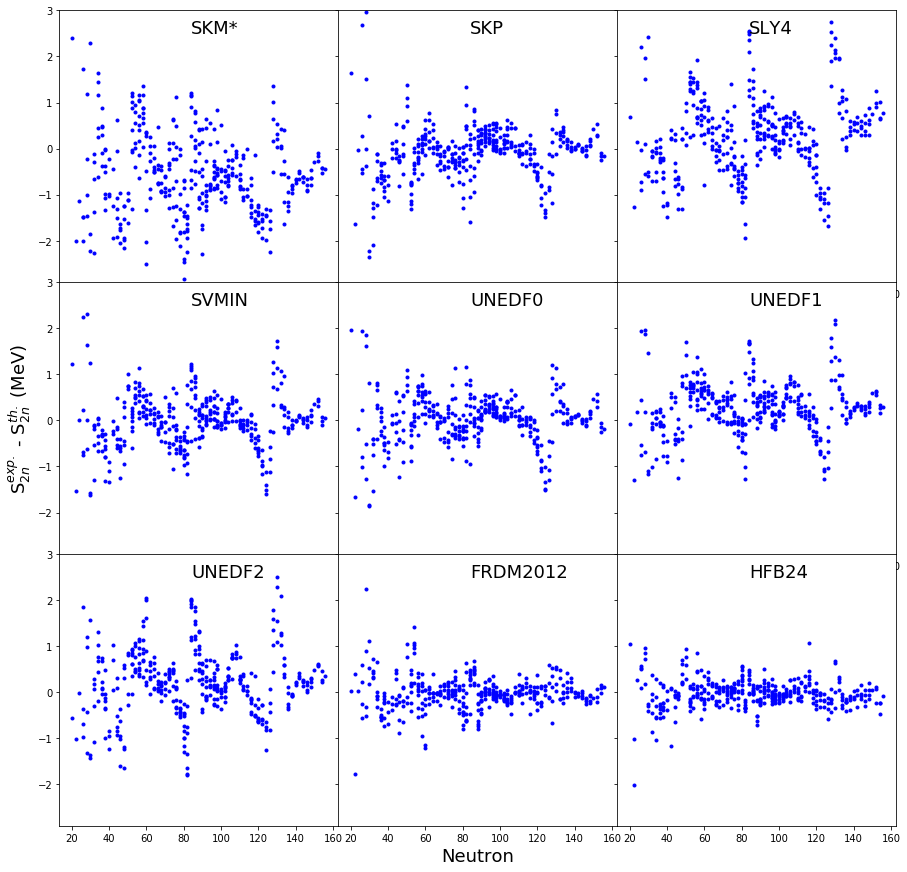

In [31]:
plot_predict(Xtrain,Ytrain,show_legend=False)

### 5 - Machine Learning

---

#### 5.1 Neural networks' parameters

In [8]:
# set optimizer parameter
adam = Adam(lr=0.01)
optm = 'adam'
# number of neurons
H = 32
# epochs, batch_sizes
n_ep = 2000
b_size = 32
# activation function
act_f = 'tanh'

Instructions for updating:
Colocations handled automatically by placer.


#### 5.2 ANN with standard input X = (Z,N)
5.2.1. Build and compile ANN models, need to do this for all 9 theory-experiment pairs.

In [9]:
ANN = {}
for edf in theory_labels:
    ANN[edf] = Sequential()
    ANN[edf].add(Dense(H, input_dim = 2, activation = act_f))
    ANN[edf].add(Dense(1))
    ANN[edf].compile(loss='mse', optimizer=optm)
    

5.2.2. Models training

In [10]:
for edf in theory_labels:
    ANN[edf].fit(Xtrain[edf], Ytrain[edf], epochs=n_ep, shuffle=True,batch_size=b_size, 
          validation_data=(Xval[edf],Yval[edf]),verbose=0)
    print (f"{edf} training complete")

Instructions for updating:
Use tf.cast instead.
SKM* training complete
SKP training complete
SLY4 training complete
SVMIN training complete
UNEDF0 training complete
UNEDF1 training complete
UNEDF2 training complete
FRDM2012 training complete
HFB24 training complete


5.2.3. Summary of predictions and improvements

In [11]:
ANN_predict,ANN_improve = predictions(ANN,Xtest,Ytest)

Theory		 ANN     raw     Improve
SKM*     	 0.832 	 1.015 	 18.03%
SKP     	 0.562 	 0.618 	 9.06%
SLY4     	 0.714 	 0.791 	 9.73%
SVMIN     	 0.447 	 0.494 	 9.51%
UNEDF0     	 0.537 	 0.543 	 1.1%
UNEDF1     	 0.466 	 0.479 	 2.71%
UNEDF2     	 0.652 	 0.688 	 5.23%
FRDM2012     	 0.38 	 0.379 	 -0.26%
HFB24     	 0.392 	 0.356 	 -10.11%


5.2.4. Compare original testing data and predictions

<Figure size 432x288 with 0 Axes>

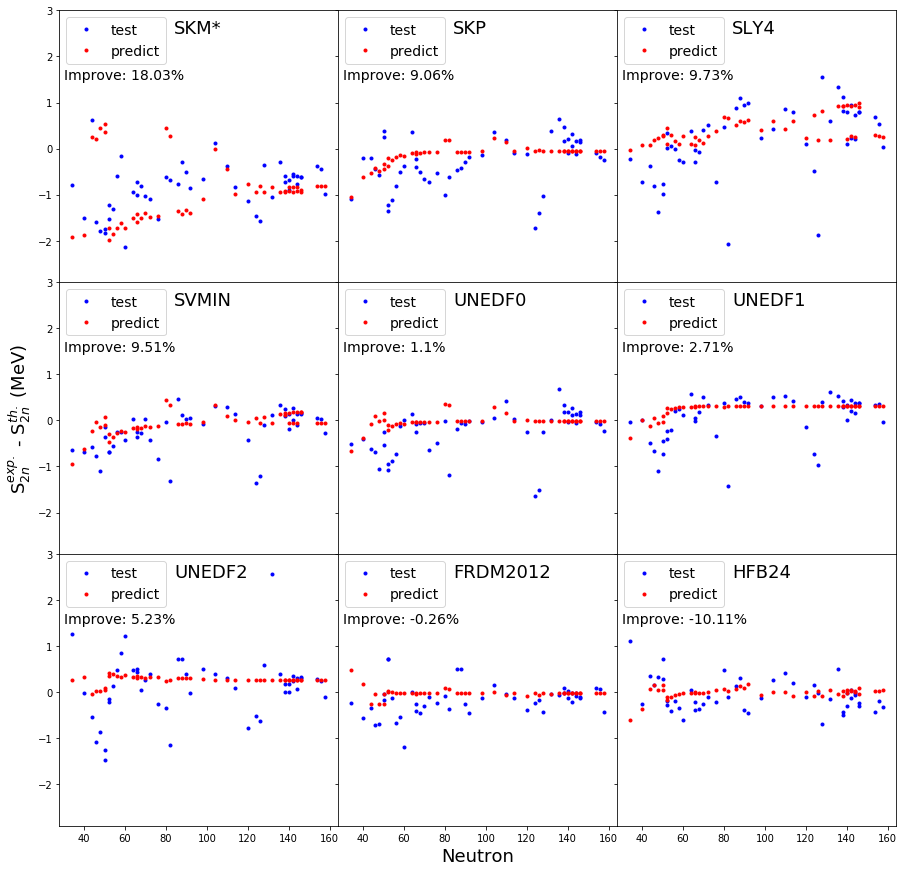

In [32]:
plot_predict(Xtest,Ytest,ANN_predict,ANN_improve)

#### 5.3 ANN with additional features

5.3.1. Motivation: Nuclear shell structure is a collective phenomenon, this information cannot be easily extracted with linear combinations of Z, N

<img src="CMSE802_final_imgs/BE_res_SLY4.png" width="70%"/>

5.3.2. Construct new input X_enrich as (X, d$_N$(X), p(X)), where:

    d$_Z$(X), d$_N$(X) denote the distance of X=(Z,N) to the closest proton and neutron magic numbers, respectively, and

\begin{equation}
p(x)=\frac{d_{Z}(x) d_{N}(x)}{d_{Z}(x)+d_{N}(x)}
\end{equation}

    is the promiscuity factor, which is an indicator of collectivity in open-shell nuclei.


5.3.3. Create transformation functions

In [13]:
# valence nucleon distance to closed shell
def dN(N):
    magics = [2,8,20,28,50,82,126]
    dists = [N-m for m in magics[::-1]]
    for d in dists:
        if d>=0: return d

# promiscuity factor
def p_fac(Z,N):
    if dN(Z)+dN(N):
        return dN(Z)*dN(N)/(dN(Z)+dN(N))
    return 0

5.3.4. Create transformed input X_enrich

In [14]:
# Transformed inputs
Xtrain_enrich,Xtest_enrich,Xval_enrich = {},{},{}

# ANN Models
ANN_enrich = {}

for edf in theory_labels:
    Xtrain_enrich[edf] = np.array([[z,n,dN(n),p_fac(z,n)] for z,n in Xtrain[edf]])
    Xtest_enrich[edf] = np.array([[z,n,dN(n),p_fac(z,n)] for z,n in Xtest[edf]])
    Xval_enrich[edf] = np.array([[z,n,dN(n),p_fac(z,n)] for z,n in Xval[edf]])
    

5.3.5. Build and compile ANN models

In [15]:
for edf in theory_labels:
    ANN_enrich[edf] = Sequential()
    ANN_enrich[edf].add(Dense(H, input_dim=4, activation=act_f))
    ANN_enrich[edf].add(Dense(1))
    ANN_enrich[edf].compile(loss='mse', optimizer=optm)

5.3.6. Models training

In [16]:
for edf in theory_labels:
    ANN_enrich[edf].fit(Xtrain_enrich[edf], Ytrain[edf], epochs=n_ep, shuffle=True
                ,batch_size=b_size,validation_data=(Xval_enrich[edf],Yval[edf]),verbose=0)
    print (f"{edf} training complete")

SKM* training complete
SKP training complete
SLY4 training complete
SVMIN training complete
UNEDF0 training complete
UNEDF1 training complete
UNEDF2 training complete
FRDM2012 training complete
HFB24 training complete


5.3.7. Summary of predictions and improvements

In [17]:
# Testing set
ANN_enrich_predict,ANN_enrich_improve = predictions(ANN_enrich,Xtest_enrich,Ytest)

Theory		 ANN     raw     Improve
SKM*     	 0.464 	 1.015 	 54.29%
SKP     	 0.404 	 0.618 	 34.63%
SLY4     	 0.405 	 0.791 	 48.8%
SVMIN     	 0.314 	 0.494 	 36.44%
UNEDF0     	 0.385 	 0.543 	 29.1%
UNEDF1     	 0.34 	 0.479 	 29.02%
UNEDF2     	 0.473 	 0.688 	 31.25%
FRDM2012     	 0.321 	 0.379 	 15.3%
HFB24     	 0.413 	 0.356 	 -16.01%


In [39]:
# Training set, check overfitting
train_predict,train_improve = predictions(ANN_enrich,Xtrain_enrich,Ytrain)

Theory		 ANN     raw     Improve
SKM*     	 0.377 	 1.055 	 64.27%
SKP     	 0.284 	 0.595 	 52.27%
SLY4     	 0.353 	 0.876 	 59.7%
SVMIN     	 0.253 	 0.586 	 56.83%
UNEDF0     	 0.305 	 0.543 	 43.83%
UNEDF1     	 0.265 	 0.649 	 59.17%
UNEDF2     	 0.328 	 0.765 	 57.12%
FRDM2012     	 0.283 	 0.364 	 22.25%
HFB24     	 0.228 	 0.309 	 26.21%


5.3.8. Compare original data and predictions

<Figure size 432x288 with 0 Axes>

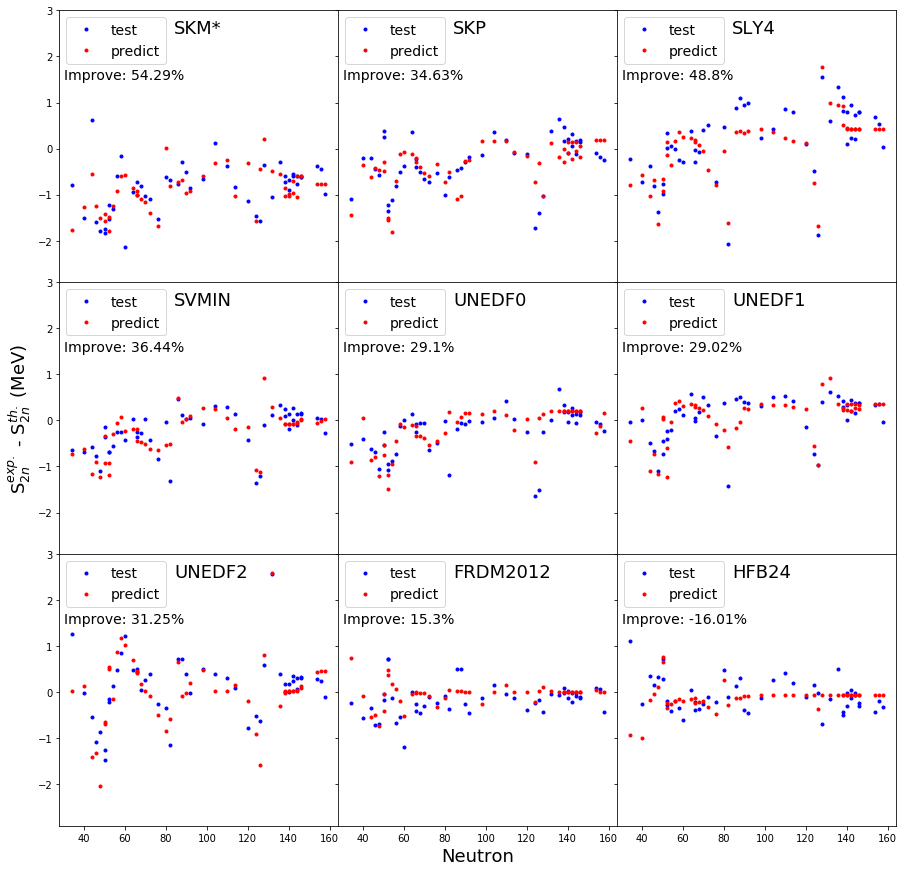

In [34]:
plot_predict(Xtest,Ytest,ANN_enrich_predict,ANN_enrich_improve)

#### 5.4 CNN with additional features

5.4.1. Reshape data sets, build and compile CNN model, models training

In [19]:
# CNN inputs
CNN_xtrain,CNN_xtest,CNN_xval = {},{},{}
# CNN models
CNN = {}

for edf in theory_labels:
    CNN_xtrain[edf] = Xtrain_enrich[edf].reshape(len(Xtrain_enrich[edf]),4,1)
    CNN_xtest[edf] = Xtest_enrich[edf].reshape(len(Xtest_enrich[edf]),4,1)
    CNN_xval[edf] = Xval_enrich[edf].reshape(len(Xval_enrich[edf]),4,1)
    CNN[edf] = Sequential()
    CNN[edf].add(Conv1D(H*2, kernel_size=3, activation=act_f, input_shape=(4,1)))
    CNN[edf].add(Flatten())
    CNN[edf].add(Dense(1))
    CNN[edf].compile(loss='mse', optimizer='adam')
    CNN[edf].fit(CNN_xtrain[edf], Ytrain[edf], epochs=n_ep, shuffle=True,batch_size=b_size
           , validation_data=(CNN_xval[edf],Yval[edf]),verbose=0)
    print (f"{edf} training complete")

SKM* training complete
SKP training complete
SLY4 training complete
SVMIN training complete
UNEDF0 training complete
UNEDF1 training complete
UNEDF2 training complete
FRDM2012 training complete
HFB24 training complete


5.4.2. Summary of predictions and improvements

In [20]:
CNN_predict,CNN_improve = predictions(CNN,CNN_xtest,Ytest)

Theory		 ANN     raw     Improve
SKM*     	 0.535 	 1.015 	 47.29%
SKP     	 0.431 	 0.618 	 30.26%
SLY4     	 0.612 	 0.791 	 22.63%
SVMIN     	 0.461 	 0.494 	 6.68%
UNEDF0     	 0.489 	 0.543 	 9.94%
UNEDF1     	 0.56 	 0.479 	 -16.91%
UNEDF2     	 0.621 	 0.688 	 9.74%
FRDM2012     	 0.361 	 0.379 	 4.75%
HFB24     	 0.36 	 0.356 	 -1.12%


5.4.3. Compare original data and predictions

<Figure size 432x288 with 0 Axes>

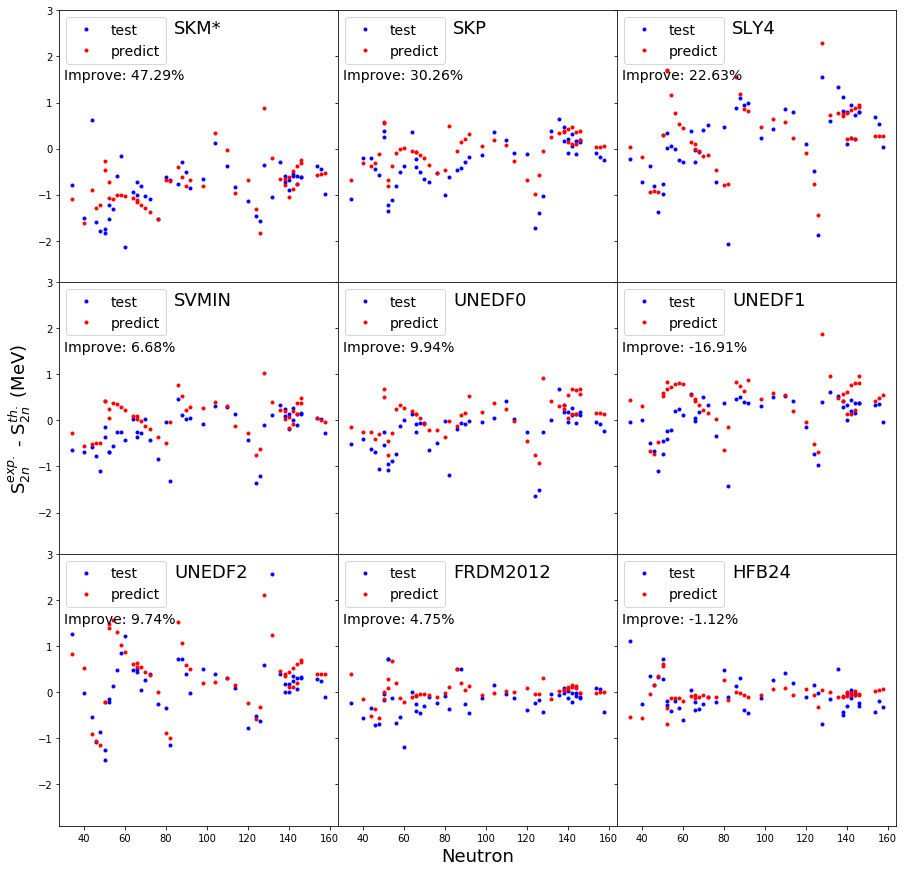

In [33]:
plot_predict(CNN_xtest,Ytest,CNN_predict,CNN_improve)

### 6 - Conclusions
---

#### 6.1 RMS improvements comparison

In [24]:
print ("Theory\t\t ANN\t\t ANN+E\t\t CNN+E")
for edf in theory_labels:
    print (edf+'    ','\t',f'{ANN_improve[edf]}%  ','\t',f'{ANN_enrich_improve[edf]}%  '
           ,'\t',f'{CNN_improve[edf]}%')

Theory		 ANN		 ANN+E		 CNN+E
SKM*     	 18.03%   	 54.29%   	 47.29%
SKP     	 9.06%   	 34.63%   	 30.26%
SLY4     	 9.73%   	 48.8%   	 22.63%
SVMIN     	 9.51%   	 36.44%   	 6.68%
UNEDF0     	 1.1%   	 29.1%   	 9.94%
UNEDF1     	 2.71%   	 29.02%   	 -16.91%
UNEDF2     	 5.23%   	 31.25%   	 9.74%
FRDM2012     	 -0.26%   	 15.3%   	 4.75%
HFB24     	 -10.11%   	 -16.01%   	 -1.12%


#### 6.2 Outlook: Bayesian Analysis and Gaussian Process

<img src="CMSE802_final_imgs/bayes_ca.png" width="70%"/>

#### 6.3 Related Articles
    Léo Neufcourt, Yuchen Cao et al.,  Phys. Rev. C. 98, 034318(2018)
    Léo Neufcourt, Yuchen Cao et al.,  Phys. Rev. Lett. 122, 062502(2019)